In [3]:
import os
os.chdir('..\\') # in ./tests folder - so changing to parent folder for imports
from consts import FOLDER2FLOW_RESULTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class df_extra:    
    def __init__(self, df):
        self.df = df
        self.num_rows = df.shape[0]
        self.data_dict = {}

    def add_data_to_df(self, col_name, data):
        self.data_dict[col_name] = [data]*self.num_rows
        self.df[col_name] = data

def print_means(df, evals):
    mus = ["0.4", "0.5", "0.6"]
    for _eval in evals:
            for mu in mus:
                for algo in df.algo.unique():
                    algo_rows = df.loc[df["algo"]==algo].loc[df["mu"]==mu]
                    avg = algo_rows["modularity - algo"].mean()
                    print(f"avg for: {algo}, {mu}, {_eval}:\t {avg}")
    return

def create_united_df(date_folder, timelimit=600): # This is a df of all networks in folder
    res_dp = os.path.join(FOLDER2FLOW_RESULTS, date_folder)
    dfs_list = []
    for network in sorted(os.listdir(res_dp), reverse=True):
        df_fp = os.path.join(res_dp, network, "results.df")
        if network.endswith(".log") or not os.path.exists(df_fp):
            continue
        df = pd.read_pickle(df_fp)

        _df_extra = df_extra(df)
        _df_extra.add_data_to_df("network", network)
        _df_extra.add_data_to_df("mu", network.split("_")[1])

        dfs_list.append(df)
    df = pd.concat(dfs_list)
    df.reset_index(inplace=True)
    del df["index"]
    
    # replace names to shorter names for readabilty
    df["algo"].replace(f"NLP-100-TL-{timelimit}", "NLP100", inplace=True)
    df["algo"].replace(f"NLP-150-TL-{timelimit}", "NLP150", inplace=True)
    df["algo"].replace(f"NLP-200-TL-{timelimit}", "NLP200", inplace=True)
    
    df["algo"].replace(f"LLP-100", "LLP100", inplace=True)
    df["algo"].replace(f"louvain-ILP-num_com_bound 150", "LLP150", inplace=True)
    df["algo"].replace(f"louvain-ILP-num_com_bound 200", "LLP200", inplace=True)
    
    return df

def run_visu(input_folder):
    df = create_united_df(input_folder)
    return df

def run_visu_benchmark(input_folder):
    res_dp = os.path.join(FOLDER2FLOW_RESULTS, input_folder)
    dfs_list = []
    for network in sorted(os.listdir(res_dp), reverse=True):
        df_fp = os.path.join(res_dp, network, "results.df")
        if network.endswith(".log") or not os.path.exists(df_fp):
            continue
        df = pd.read_pickle(df_fp)

        _df_extra = df_extra(df)
        _df_extra.add_data_to_df("network", network)

        dfs_list.append(df)
    df = pd.concat(dfs_list)
    df.reset_index(inplace=True)
    del df["index"]
    return df

def create_bar_graphs_benchmark(df, evals, title="Graph"):
    for eval in evals:
        name = f"{title}-{eval}"
        ax = sns.barplot(x="network", y=eval, hue="algo", data=df).set(title=name)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

def create_bar_graphs(df, evals, title="Graph"):
    for eval in evals:
        name = f"{title}-{eval}"
        sns_plot = sns.barplot(x="mu", y=eval, hue="algo", data=df).set(title=name)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()



evals=["modularity - algo", "jaccard","graph_accuracy","graph_conductance"]



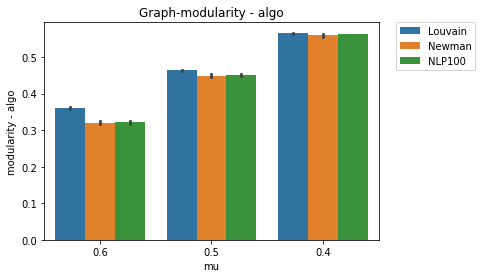

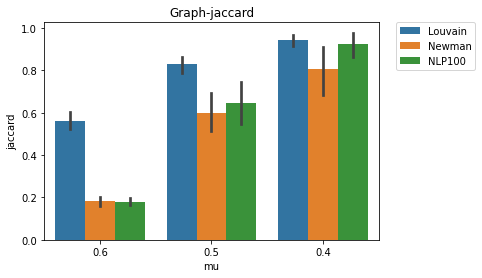

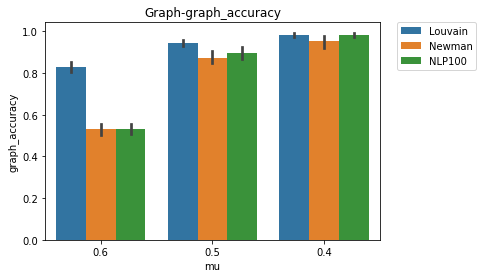

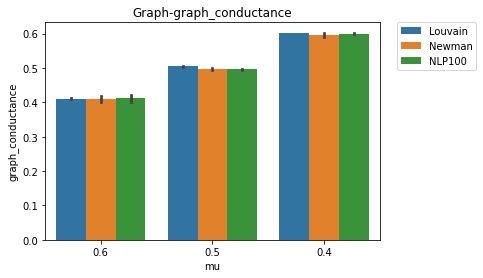

avg for: Louvain, 0.4, modularity - algo:	 0.5652365614450792
avg for: Newman, 0.4, modularity - algo:	 0.5594059379673517
avg for: NLP100, 0.4, modularity - algo:	 0.5629282178934492
avg for: Louvain, 0.5, modularity - algo:	 0.46347373222127375
avg for: Newman, 0.5, modularity - algo:	 0.4492960810730981
avg for: NLP100, 0.5, modularity - algo:	 0.4506318697277498
avg for: Louvain, 0.6, modularity - algo:	 0.3596505954644748
avg for: Newman, 0.6, modularity - algo:	 0.3206635061839221
avg for: NLP100, 0.6, modularity - algo:	 0.32118641978520335
avg for: Louvain, 0.4, jaccard:	 0.5652365614450792
avg for: Newman, 0.4, jaccard:	 0.5594059379673517
avg for: NLP100, 0.4, jaccard:	 0.5629282178934492
avg for: Louvain, 0.5, jaccard:	 0.46347373222127375
avg for: Newman, 0.5, jaccard:	 0.4492960810730981
avg for: NLP100, 0.5, jaccard:	 0.4506318697277498
avg for: Louvain, 0.6, jaccard:	 0.3596505954644748
avg for: Newman, 0.6, jaccard:	 0.3206635061839221
avg for: NLP100, 0.6, jaccard:	 0.

,algo,modularity - real,modularity - algo,jaccard,graph_conductance,graph_sensitivity,graph_accuracy,num communities - real,num communities - algo,num_coms_divided,num_coms_skipped,number_of_mega_nodes,iterations,split_method,time-sec,network,mu
0,Louvain,0.363148,0.358137,0.519556,0.409949,0.938,0.813774,30,20,NaN,NaN,None,None,random,0.146465,1000_0.6_9,0.6
1,Newman,0.363148,0.330070,0.237799,0.406216,0.835,0.604756,30,13,NaN,NaN,None,None,random,0.446721,1000_0.6_9,0.6
2,NLP100,0.363148,0.326918,0.196896,0.426389,0.836,0.549360,30,10,0.0,6.0,None,None,random,15.116324,1000_0.6_9,0.6
3,Louvain,0.362887,0.357602,0.619182,0.406846,0.947,0.862204,28,21,NaN,NaN,None,None,random,0.121044,1000_0.6_8,0.6
4,Newman,0.362887,0.327769,0.203200,0.432347,0.839,0.560914,28,10,NaN,NaN,None,None,random,0.335784,1000_0.6_8,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Newman,0.565020,0.558975,0.724490,0.601412,0.999,0.944514,31,27,NaN,NaN,None,None,random,0.486788,1000_0.4_1,0.4
86,NLP100,0.565020,0.564397,0.992477,0.599375,0.998,0.998000,31,31,10.0,0.0,None,None,random,105.470705,1000_0.4_1,0.4
87,Louvain,0.564733,0.565410,0.886834,0.603145,1.000,0.965919,31,28,NaN,NaN,None,None,random,0.169533,1000_0.4_0,0.4
88,Newman,0.564733,0.561331,0.923737,0.597165,0.989,0.976926,31,30,NaN,NaN,None,None,random,0.562040,1000_0.4_0,0.4


In [12]:
input_folder = "15-06-2022--18-08-32"
df = run_visu(input_folder)
create_bar_graphs(df,evals)
print_means(df, evals)
display(df)